# **Análise de voos no Brasil**
---

### **1. Introdução**

O setor de aviação civil no Brasil é um componente vital da infraestrutura de transporte do país, conectando um território de dimensão continental e facilitando o fluxo de pessoas e negócios. De acordo com a Agência Nacional de Aviação Civil (ANAC), em 2024, o Brasil teve uma movimentação de 118.3 milhões de passageiros na soma dos mercados doméstico e internacional - resultado abaixo apenas da movimentação de 2019 (118.6).

Esse dado reforça a importância do transporte aéreo para um país com as dimensões do Brasil, onde as viagens aéreas são muitas vezes a única opção prática para cobrir grandes distâncias. A importância da aviação no Brasil vai além do simples deslocamento de passageiros. Ela desempenha um papel crucial no desenvolvimento econômico, promovendo o turismo, facilitando o comércio e estimulando investimentos em diversas regiões.

A Agência Nacional de Aviação Civil (ANAC) regula e fiscaliza a aviação civil no Brasil. Ela é uma agência reguladora federal, vinculada ao Ministério da Infraestrutura. A ANAC monitora diversos aspectos do setor, incluindo pontualidade dos voos, a qualidade dos serviços prestados pelas companhias aéreas e a conformidade com as normas.

### **1.1. Objetivo do estudo**

**`Este estudo analisa os dados de voos regulares nacionais e internacionais, com transporte de passageiros, durante a última década (janeiro de 2015 a dezembro de 2024), visando extrair insights sobre os padrões do setor de aviação civil nacional. Serão considerados aspectos como volume de voos, sazonalidade, rotas e pontualidade.`**

### **1.2. Origem dos dados**

Todos os dados utilizados foram obtidos a partir do [portal oficial de dados abertos da ANAC](https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas)

Para a realização do estudo, foram utilizadas quatro bases de dados principais:

- [Voo Regular Ativo (VRA)](https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/voo-regular-ativo-vra): Histórico de voos - reúne informações detalhadas sobre os voos, incluindo o horário previsto e o horário efetivamente realizado. empresas aéreas e etc


- [Lista de Aeródromos públicos V2](https://www.gov.br/anac/pt-br/assuntos/regulados/aeroportos-e-aerodromos/cadastro-de-aerodromos/aerodromos-cadastrados/cadastro-de-aerodromos-civis-publicos.csv): Dados cadastrais de aeroportos públicos nacionais

- [Lista de Aeródromos privados V2](https://sistemas.anac.gov.br/dadosabertos/Aerodromos/Aer%C3%B3dromos%20Privados/Lista%20de%20aer%C3%B3dromos%20privados/Aerodromos%20Privados/AerodromosPrivados.csv): Dados cadastrais de aeroportos privados nacionais

- [Glossário de Aeródromos](https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/historico-de-voos/vra/glossario_de_aerodromo.xls): Descrição das siglas de aeroportos incluindo os internacionais

### **1.3. Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

---

### **2. Download dos arquivos CSV**

**VRA**

A base de voo regular ativo é organizada hierarquicamente no portal ANAC: ANO > MÊS > Link download CSV. Esta estrutura é consistente para todo o período analisado (2015 a 2024). O link de download dos arquivos segue um padrão uniforme, facilitando a automação do processo de obtenção dos dados.

- Padrão da url: https://siros.anac.gov.br/siros/registros/diversos/vra/{ANO}/VRA_{ANO}_{MÊS}.csv

Graças à consistência do padrão de URL, foi possível utilizar a biblioteca pandas para efetuar o download diretamente, sem necessidade de navegação manual pelo site.

Além disso, após explorar alguns arquivos mensais, foi constatado que ao longo do período analisado, as planilhas seguem uma mesma estrutura de colunas. Por isso, foi tomada a decisão de agrupar todas as informações em um único arquivo, facilitando a análise subsequente.

**Aeroportos**

A base de aeroportos consiste em dois links de download CSV - um para aeroportos públicos e outro para aeroportos privados + um link de download XLS - para acessar informações de aeroportos internacionais



In [ ]:
anos_analisados = range(2015, 2025)
meses_analisados = range(1,13)
base_vra = []

for ano in anos_analisados:
    for mes in meses_analisados:
        url = f'https://siros.anac.gov.br/siros/registros/diversos/vra/{ano}/VRA_{ano}_{mes:02d}.csv'
        try:
            df = pd.read_csv(url, sep=';', low_memory=False)
            base_vra.append(df)
        except Exception as e:
            print(f'erro no dowload {mes}/{ano}: {e}')

base_vra = pd.concat(base_vra)
base_vra.to_csv('vra_2015-2024_original.csv',sep=';')

In [ ]:
url_aeroportos_privados = 'https://sistemas.anac.gov.br/dadosabertos/Aerodromos/Aer%C3%B3dromos%20Privados/Lista%20de%20aer%C3%B3dromos%20privados/Aerodromos%20Privados/AerodromosPrivados.csv'
url_aeroportos_publicos = 'https://www.gov.br/anac/pt-br/assuntos/regulados/aeroportos-e-aerodromos/cadastro-de-aerodromos/aerodromos-cadastrados/cadastro-de-aerodromos-civis-publicos.csv'
url_glossario_aeroportos = 'https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/historico-de-voos/vra/glossario_de_aerodromo.xls'

base_aeroportos_privados = pd.read_csv(url_aeroportos_privados, sep=';', low_memory=False, encoding='latin1')
base_aeroportos_publicos = pd.read_csv(url_aeroportos_publicos, sep=';', low_memory=False, encoding='utf-8')
base_aeroporto_internacionais = pd.read_excel(url_glossario_aeroportos)

base_aeroportos_privados.to_csv('aeroportos_privados_original.csv',sep=';')
base_aeroportos_publicos.to_csv('aeroportos_publicos_original.csv',sep=';')
base_aeroporto_internacionais.to_csv('glossario_de_aerodromos_original.csv', sep=';')


---

### **3. Reconhecimento dos dados**

Nesta seção, é realizada uma análise preliminar para entender a estrutura e as principais características dos dados. Foram examinados aspectos como o formato das variáveis, a presença de valores ausentes, a distribuição inicial dos dados e possíveis inconsistências

### **3.1. Visualização inicial da Base de dados Voo Regular ativo (VRA)**

A base de dados de voos regulares ativos, consolidada com as informações de 2015 e 2024, contém 9.501.810 linhas e 20 colunas. As colunas representam diferentes atributos do voo:

In [2]:
# Processamento do arquivo CSV
df_vra = pd.read_csv('vra_2015-2024_original.csv', sep=';', low_memory=False)

# Visualização das 5 primeiras linhas
df_vra.head(5)

,Unnamed: 0,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,...,Partida Real,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada
0,0,AAL,"AMERICAN AIRLINES, INC.",203,0,I,B763,219.0,SBPA,SALGADO FILHO - PORTO ALEGRE - RS - BRASIL,...,02/01/2015 01:20,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/01/2015 10:32,02/01/2015 10:32,REALIZADO,NaN,2015-01-01,Pontual,Pontual
1,1,AAL,"AMERICAN AIRLINES, INC.",203,0,I,B763,219.0,SBCT,AFONSO PENA - SÃO JOSÉ DOS PINHAIS - PR - BRASIL,...,01/01/2015 23:03,SBPA,SALGADO FILHO - PORTO ALEGRE - RS - BRASIL,02/01/2015 00:05,02/01/2015 00:24,REALIZADO,CONEXÃO DE AERONAVE,2015-01-01,Pontual,Pontual
2,2,AAL,"AMERICAN AIRLINES, INC.",203,0,I,B763,219.0,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",...,01/01/2015 13:20,SBCT,AFONSO PENA - SÃO JOSÉ DOS PINHAIS - PR - BRASIL,01/01/2015 21:18,01/01/2015 21:58,REALIZADO,FALHA EQUIPO AUTOMOTIVO E DE ATENDIMENTO DE PAX,2015-01-01,Atraso 30-60,Atraso 30-60
3,3,AAL,"AMERICAN AIRLINES, INC.",213,0,I,B752,174.0,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",...,01/01/2015 02:52,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,01/01/2015 10:24,01/01/2015 10:24,REALIZADO,NaN,2015-01-01,Pontual,Pontual
4,4,AAL,"AMERICAN AIRLINES, INC.",214,0,I,B752,174.0,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,...,01/01/2015 00:01,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2015 07:45,01/01/2015 07:45,REALIZADO,NaN,2015-01-01,Pontual,Pontual


In [3]:
# Analise do tipo de dados
df_vra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501810 entries, 0 to 9501809
Data columns (total 21 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Sigla ICAO Empresa Aérea      object 
 2   Empresa Aérea                 object 
 3   Número Voo                    object 
 4   Código DI                     object 
 5   Código Tipo Linha             object 
 6   Modelo Equipamento            object 
 7   Número de Assentos            float64
 8   Sigla ICAO Aeroporto Origem   object 
 9   Descrição Aeroporto Origem    object 
 10  Partida Prevista              object 
 11  Partida Real                  object 
 12  Sigla ICAO Aeroporto Destino  object 
 13  Descrição Aeroporto Destino   object 
 14  Chegada Prevista              object 
 15  Chegada Real                  object 
 16  Situação Voo                  object 
 17  Justificativa                 object 
 18  Referência            

**Descrição das colunas**

- **`Sigla ICAO Empresa Aérea`**: Sigla/Designador ICAO Empresa Aérea. Refere-se ao designador da empresa de transporte aéreo obtido junto à OACI (Organização da Aviação Civil Internacional).

- **`Empresa Aérea`**: Nome da empresa aérea.

- **`Número Voo`**: Numeração do voo.

- **`Código DI`**: Caractere usado para identificar o Dígito Identificador (DI) para cada etapa de voo.

- **`Código Tipo Linha`**: Caractere usado para identificar o Tipo de Linha realizada para cada etapa de voo.

- **`Modelo Equipamento`**: Modelo do equipamento utilizado no voo no padrão ICAO.

- **`Número de Assentos`**: Quantidade de assentos da aeronave.

- **`Sigla ICAO Aeroporto Origem`**: Sigla/Designador ICAO Aeroporto de Origem.

- **`Descrição Aeroporto Origem`**: Nome do aeroporto, cidade, estado e país no qual é localizado.

- **`Sigla ICAO Aeroporto Destino`**: Sigla/Designador ICAO Aeroporto de Destino.

- **`Descrição Aeroporto Destino`**: Nome do aeroporto, cidade, estado e país no qual é localizado.

- **`Partida Prevista`**: Data e horário da partida prevista informada pela empresa aérea, em horário de Brasília.

- **`Partida Real`**: Data e horário da partida realizada informada pela empresa aérea, em horário de Brasília.

- **`Chegada Prevista`**: Data e horário da chegada prevista informada pela empresa aérea, em horário de Brasília.

- **`Chegada Real`**: Data e horário da chegada realizada, informada pela empresa aérea, em horário de Brasília.

- **`Situação do voo`**: Campo informando a situação do voo: realizado, cancelado ou não informado.

- **`Justificativa`**: Este campo deixou de ser exigido a partir de abril de 2020, com a revogação da Instrução de Aviação Civil (IAC) 1504.

- **`Referência`**: Data de Referência. Corresponde à Data Prevista de Início do voo.

- **`Situação Partida`**: Campo informando a situação do voo na partida: Antecipado, Pontual, Atraso 30-60, Atraso 60-120, Atraso 120-240, Atraso > 240.

- **`Situação Chegada`**: Campo informando a situação do voo na chegada: Antecipado, Pontual, Atraso 30-60, Atraso 60-120, Atraso 120-240, Atraso > 240.


In [4]:
# Analise percentual de valores nulos
(df_vra.isnull().sum() / df_vra.shape[0]).sort_values(ascending=False)

Justificativa                   0.782545
Situação Partida                0.252796
Situação Chegada                0.252762
Partida Real                    0.220609
Chegada Real                    0.220575
Chegada Prevista                0.032198
Partida Prevista                0.032197
Número de Assentos              0.000176
Modelo Equipamento              0.000171
Descrição Aeroporto Origem      0.000117
Descrição Aeroporto Destino     0.000097
Código Tipo Linha               0.000041
Unnamed: 0                      0.000000
Código DI                       0.000000
Número Voo                      0.000000
Empresa Aérea                   0.000000
Sigla ICAO Empresa Aérea        0.000000
Sigla ICAO Aeroporto Destino    0.000000
Sigla ICAO Aeroporto Origem     0.000000
Situação Voo                    0.000000
Referência                      0.000000
dtype: float64

- A alta porcentagem (78%) de valores nulos em "justificativa" indica que essa informação não é frequentemente registrada.

- Os campos relacionados a situações e horários reais de partidas e chegada têm um percentual significativo (+20%) de valores nulos. Isso pode estar relacionado com a quantidade de voos cancelados, onde essa informação não é registrada. No entanto, é um ponto de atenção pois pode afetar análises relacionadas a pontualidade dos voos.

In [5]:
# Visão geral das variáveis categóricas
colunas = [
    'Empresa Aérea',
    'Descrição Aeroporto Origem',
    'Descrição Aeroporto Destino',
    'Modelo Equipamento',
    'Situação Voo',
    'Código DI',
    'Código Tipo Linha'
]

df_vra[colunas].describe()

,Empresa Aérea,Descrição Aeroporto Origem,Descrição Aeroporto Destino,Modelo Equipamento,Situação Voo,Código DI,Código Tipo Linha
count,9501810,9500700,9500889,9500186,9501810,9501810,9501419
unique,220,766,784,141,3,15,10
top,AZUL LINHAS AÉREAS BRASILEIRAS S/A,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,B738,REALIZADO,0,N
freq,2815887,1267796,1269509,1771063,8839234,9081679,6907252


A partir da análise das variáveis categóricas, algumas informações podem ser destacadas:

**Empresas aéreas**:
- Um total de 220 empresas aéreas distintas operaram voos no período analisado.
- A Azul Linhas Aéreas destacou-se como a companhia mais ativa, realizando aproximadamente 2,8 milhões de voos.

**Aeroportos**:
- Diversidade de origens: 766 aeroportos diferentes serviram como ponto de partida para voos.
- Diversidade de destinos: 784 aeroportos diferentes foram registrados como destinos de voos.
- O Aeroporto de Guarulhos é o mais movimentado, liderando tanto em número de partidas quanto de chegadas.

**Situação dos voos**:
- A vasta maioria dos voos registrados (93%) possui o status "Realizado"

Outras informações, como Código DI e Código Tipo Linha, exigem uma análise um pouco mais aprofundada para entender o significado dos registros:

In [6]:
contagem_codigo_DI = df_vra['Código DI'].value_counts()
contagem_codigo_DI

Código DI
0    9081679
2     173615
4      60363
6      48667
9      38426
1      33425
7      31487
3      24670
D       3515
5       3132
E       1053
B        965
         756
A         50
8          7
Name: count, dtype: int64

O código DI refere-se ao caractere utilizado para identificar o tipo de autorização para cada etapa de voo, assumindo os seguintes valores:
- 0 - Etapa Regular
- 2 - Etapa Extra
- 3 - Etapa de Retorno
- 4 - Inclusão de Etapa
- 6 - Etapa Não Remunerada Sem Transporte de Objetos
- 7 - Etapa de Voo de Fretamento
- 9 - Etapa de Voo Charter
- D - Etapa de Voo Duplicada

In [7]:
contagem_codigo_linha = df_vra['Código Tipo Linha'].value_counts()
contagem_codigo_linha

Código Tipo Linha
N    6907252
I    1239637
R     695850
G     248094
E     184799
C     156154
X      45771
L      22460
H       1176
         226
Name: count, dtype: int64

O código tipo linha identifica o tipo de operação realizado no voo. Dentre as principais classificações estão:

- N - Doméstica Mista: Para operações de transporte aéreo de passageiros ou mistas, em que todos os aeródromos envolvidos estejam situados simultaneamente em território brasileiro;

- C - Doméstica Cargueira: Para operações de transporte aéreo exclusivo de carga e/ou mala postal em que todos os aeródromos envolvidos estejam situados simultaneamente em território brasileiro;

- I - Internacional Mista: Para operações de transporte aéreo de passageiros ou mistas, em que ao menos um dos aeródromos envolvidos esteja situado em território estrangeiro;

- G - Internacional Cargueira: Para operações de transporte aéreo exclusivo de carga e/ou rede postal em que ao menos um dos aeródromos envolvidos esteja situado em território estrangeiro

Tendo em vista o objetivo da nossa análise, iremos considerar apenas os voos com o Código N e I

### **3.2. Visualização inicial das bases de dados de aeroportos**

As bases de aeroportos públicos e privados apresentam informações completas de cadastro. No entanto, para os objetivos deste estudo, essas bases terão uma função complementar a base principal de voos regulares ativos (VRA). Portanto, serão consideradas apenas as colunas relevantes para a análise geográfica e identificação dos aeroportos:
- Código OACI
- Nome
- Município
- Estado


In [8]:
# Processamento do arquivo CSV (aeroportos públicos)
df_aeroporto_publico = pd.read_csv('aeroportos_publicos_original.csv', sep=';', low_memory=False)

# Visualização das 5 primeiras linhas (aeroportos públicos)
df_aeroporto_publico.head(5)

,Unnamed: 0,Aeródromo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Geoespacial,Unnamed: 6,Unnamed: 7,Operação,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Medidas Administrativas (DOU),Unnamed: 50,Unnamed: 51,Outros,Unnamed: 53
0,0,CÓDIGO OACI,CIAD,NOME,MUNICÍPIO ATENDIDO,UF,LATITUDE,LONGITUDE,ALTITUDE,OPERAÇÃO,...,FREQ. SEMANAL,r1,r2,REFERÊNCIA(S),RESTRIÇÃO(ÕES),SITUAÇÃO,r1,REFERÊNCIA,SITUADO NA AMAZÔNIA LEGAL,OBSERVAÇÕES
1,1,SBAA,PA0008,CONCEIÇÃO DO ARAGUAIA,CONCEIÇÃO DO ARAGUAIA,PA,8° 20' 55'' S,49° 18' 11'' W,199 m,VFR Diurno/Noturno e IFR Diurno,...,-,-,-,-,-,Proibição de operações de pouso de aeronaves d...,PA2019-1362,PA2019-1362,X,-
2,2,SBAE,SP0010,BAURU/AREALVA,BAURU,SP,22° 9' 28'' S,49° 4' 6'' W,598 m,VFR Diurno/Noturno e IFR Diurno/Noturno,...,-,-,-,-,-,-,-,-,NaN,-
3,3,SBAQ,SP0012,BARTOLOMEU DE GUSMÃO,ARARAQUARA,SP,21° 48' 43'' S,48° 7' 59'' W,711 m,VFR Diurno/Noturno e IFR Diurno/Noturno,...,-,-,-,-,-,-,-,-,NaN,-
4,4,SBAR,SE0001,SANTA MARIA,ARACAJU,SE,10° 59' 7'' S,37° 4' 24'' W,7 m,VFR Diurno/Noturno e IFR Diurno/Noturno,...,NaN,PA2022-7303 / PA2020-0406 / PA2021-4220,-,PA2022-7303 / PA2020-0406 / PA2021-4220,-,-,-,-,NaN,-


In [9]:
# Processamento do arquivo CSV (aeroportos privados)
df_aeroporto_privado = pd.read_csv('aeroportos_privados_original.csv', sep=';', low_memory=False)
# Visualização das 5 primeiras linhas (aeroportos privados)
df_aeroporto_privado.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Atualizado em: 2025-03-03
0,Código OACI,CIAD,Nome,Município,UF,Longitude,Latitude,Altitude,Operação Diurna,Operação Noturna,...,Superfície 1,Designação 2,Comprimento 2,Largura 2,Resistência 2,Superfície 2,Portaria de Registro,Link Portaria,LATGEOPOINT,LONGEOPOINT
1,SI8V,AM0101,FAZENDA MANU,LÁBREA,AM,"065°42'54""W","09°24'14""S",",0",VFR,Sem Operação,...,Cascalho,02/20,"1200,0000","18,00","5700 Kg / 0,50 MPa",Cascalho,PA2022-8592,https://pergamum.anac.gov.br/arquivos/PA2022-8...,"-9,4038889","-65,715"
2,SN33,AM0095,Estância Buriti,AUTAZES,AM,"059°46'38""W","03°32'40""S","31,0",VFR,Sem Operação,...,Terra,14/32,"500,0000","18,00","5700 Kg / 0,50 MPa",Terra,PA2022-9754,https://pergamum.anac.gov.br/arquivos/PA2022-9...,"-3,5444444","-59,777222"
3,SSVC,MS0533,Fazenda Vazante,AQUIDAUANA,MS,"056°09'42""W","20°03'48""S","124,0",VFR / IFR,VFR / IFR,...,Grama,15/33,"2100,0000","45,00",44/F/B/X/T,Asfalto,PA2002-2077,https://pergamum.anac.gov.br/arquivos/PA2002-2...,"-20,063333","-56,161667"
4,SJ4S,PR0191,Fazenda Candoara,CANDÓI,PR,"052°15'32""W","25°40'41""S","723,0",VFR,VFR,...,Cascalho,08/26,"650,0000","16,00","5600 Kg / 1,50 MPa",Cascalho,PA2022-8572,https://pergamum.anac.gov.br/arquivos/PA2022-8...,"-25,678056","-52,258889"


In [10]:
# Processamento do arquivo CSV (aeroportos internancionais)
df_aeroporto_internacional = pd.read_csv('glossario_de_aerodromos_original.csv', sep=';', low_memory=False)
# Visualização das 5 primeiras linhas (aeroportos internancionais)
df_aeroporto_internacional.head(5)

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,NaN,Glossário de Aeródromos,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,Sigla OACI,Descrição,Cidade,UF,País,Continente
3,3,NaN,1AON,OUROLANDIA DO NORTE,OURILANDIA DO NORTE,PA,BRASIL,AMERICA DO SUL
4,4,NaN,2NHT,HOTEL TRANSAMÉRICA,UNA,BA,BRASIL,AMERICA DO SUL



---

### **4. Tratamento de dados**

Nesta seção, são realizadas as etapas de limpeza e transformação dos dados, essenciais para garantir a consistência e a integridade das informações utilizadas na análise.

### **4.1. Tratamento da base de dados Voo Regular Ativo (VRA)**

**Filtragem**

O foco da análise são os voos **nacionais** e **intenacionais** com transporte de passageiro **realizados** - o primeiro passo do tratamento da base VRA foi filtrar o dataset para seguir esses critérios.

**Exclusão de colunas**

Na análise inicial, foi possível notar que algumas colunas não contribuem diretamente para os objetivos do estudo:  

- **`Situação do Voo`**: A coluna não fará parte do dataset final. O filtro para voos realizados resulta em um valor uniforme "realizado" para esta coluna, tornando-a desnecessária.  

- **`Justificativa`**: Este campo de observação não estruturado, sem padrão consistente e com alta porcentagem de valores nulos, não será incluído no dataset final para manter a qualidade dos dados.  

- **`Situação da Partida`** e **`Situação da Chegada`**: Estas colunas, que informam o status do voo em relação aos horários de forma imprecisa, não serão mantidas. Em seu lugar, haverá um cálculo mais preciso de atraso e adiantamento, com um novo campo de status baseado nessas informações.  

**Conversão do tipo de dado**  

As colunas contendo informações de data e hora foram convertidas do tipo **objeto** para **datetime**.  

**Colunas adicionais**  

Além das operações de filtragem, exclusão de colunas e conversão de tipos de dados, foram criadas as seguintes colunas complementares para enriquecer a análise:  

- **`Desvio Partida (min)`**: Calcula a diferença em minutos entre a partida real e a partida prevista.  

- **`Status Partida`**: Categoriza o desvio da partida em **"Adiantado"** (< 0 min), **"Pontual"** (0-30 min) ou **"Atrasado"** (> 30 min).  

- **`Desvio Chegada (min)`**: Calcula a diferença em minutos entre a chegada real e a chegada prevista.  

- **`Status Chegada`**: Categoriza o desvio da chegada em **"Adiantado"** (< 0 min), **"Pontual"** (0-30 min) ou **"Atrasado"** (> 30 min).  

- **`Horário de Referência`**: Classifica o horário de partida prevista em períodos do dia - **"Madrugada"** (00:00-05:59), **"Manhã"** (06:00-11:59), **"Tarde"** (12:00-17:59) ou **"Noite"** (18:00-23:59).  

- **`Dia de Referência`**: Extrai o dia do mês da partida prevista.  

- **`Dia da Semana de Referência`**: Extrai o nome do dia da semana da partida prevista.  

- **`Mês de Referência`**: Extrai o nome do mês da partida prevista.  

- **`Ano de Referência`**: Extrai o ano da partida prevista.  

Essas colunas adicionais permitem uma análise mais detalhada dos padrões de voo, pontualidade e distribuição temporal dos voos, facilitando insights sobre sazonalidade, desempenho por rota e variações ao longo do tempo.  




In [11]:
# Filtragem do df para considerar apenas os voos realizados e nacionais
df_vra = df_vra[(df_vra['Situação Voo'] == 'REALIZADO') &
                (df_vra['Código Tipo Linha'].isin(['N', 'I']))]


In [12]:
# Verificando os valores nulos após filtragem do dataframe
df_vra.isnull().sum().sort_values(ascending=False)

Justificativa                   6402649
Situação Partida                1228009
Situação Chegada                1227689
Partida Real                     989151
Chegada Real                     988831
Chegada Prevista                 238871
Partida Prevista                 238871
Modelo Equipamento                 1543
Número de Assentos                 1542
Descrição Aeroporto Origem          418
Descrição Aeroporto Destino         418
Unnamed: 0                            0
Sigla ICAO Empresa Aérea              0
Código DI                             0
Número Voo                            0
Empresa Aérea                         0
Código Tipo Linha                     0
Sigla ICAO Aeroporto Destino          0
Sigla ICAO Aeroporto Origem           0
Situação Voo                          0
Referência                            0
dtype: int64

Mesmo após a exclusão dos voos cancelados, as colunas de partida e chegada real, ainda apresentam aproximadamente 13% de valores nulos, o que exigirá estratégias de tratamento de dados para garantir a consistência da análise de pontualidade. Além disso, aproximadamente 3% dos valores estão ausentes especificamente nas colunas de chegada e partida prevista. Como a situação de partida e chegada depende dessas informações, essa variável também apresenta cerca de 15% de valores nulos, demandando abordagens adequadas para mitigar possíveis impactos nas conclusões.

In [13]:
# Análise de valores nulos
df_nulos = df_vra[df_vra['Partida Real'].isnull()]

df_nulos[['Empresa Aérea', 'Descrição Aeroporto Origem', 'Descrição Aeroporto Destino',
          'Modelo Equipamento', 'Código DI', 'Modelo Equipamento']].describe()



,Empresa Aérea,Descrição Aeroporto Origem,Descrição Aeroporto Destino,Modelo Equipamento,Código DI,Modelo Equipamento
count,989151,989118,989080,989150,989151,989150
unique,57,174,176,45,3,45
top,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,B738,0,B738
freq,308210,157985,159972,306318,989144,306318


In [14]:
(df_nulos['Empresa Aérea'].value_counts()/df_nulos.shape[0]).sort_values(ascending=False)

Empresa Aérea
GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)                                    0.311590
TAM LINHAS AÉREAS S.A.                                                                 0.267282
OCEANAIR LINHAS AÉREAS S.A. (AVIANCA)                                                  0.120631
AZUL LINHAS AÉREAS BRASILEIRAS S/A                                                     0.077515
COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLINES)                                     0.033640
AEROLINEAS ARGENTINAS S/A                                                              0.026010
AMERICAN AIRLINES, INC.                                                                0.024140
TAP - TRANSPORTES AÉREOS PORTUGUESES S/A                                               0.014160
LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A)                                           0.011651
IBÉRIA LINEAS AEREAS DE ESPAÑA SOCIEDAD ANONIMA OPERADORA                              0.010564
UNITED AIRLINES, INC      

GOL e TAM se destacam pelo alto número de valores nulos, representando mais da metade dos registros sem informações de "Partida Real". Esse percentual sugere que pode haver um problemas específicos relacionados à companhia

In [15]:
# Limpeza de colunas desnecessárias para a análise
df_vra = df_vra.drop(
    ['Unnamed: 0', 'Justificativa', 'Situação Voo', 'Código DI',
     'Situação Partida', 'Situação Chegada'], axis=1
)

# Conversão das colunas de data para o formato datetime
df_vra['Partida Prevista'] = pd.to_datetime(df_vra['Partida Prevista'], format='%d/%m/%Y %H:%M')
df_vra['Chegada Prevista'] = pd.to_datetime(df_vra['Chegada Prevista'], format='%d/%m/%Y %H:%M')
df_vra['Partida Real'] = pd.to_datetime(df_vra['Partida Real'], format='%d/%m/%Y %H:%M')
df_vra['Chegada Real'] = pd.to_datetime(df_vra['Chegada Real'], format='%d/%m/%Y %H:%M')
df_vra['Referência'] = pd.to_datetime(df_vra['Referência'])

# Cálculo do desvio de partida e definição de status apenas para as linhas com dados completos
mask_partida = df_vra[['Partida Real', 'Partida Prevista']].notnull().all(axis=1)
df_vra.loc[mask_partida, 'Desvio Partida (min)'] = (
    (df_vra.loc[mask_partida, 'Partida Real'] - df_vra.loc[mask_partida, 'Partida Prevista'])
    .dt.total_seconds() / 60
)

df_vra['Status Partida'] = df_vra['Desvio Partida (min)'].apply(
    lambda x: 'Desconhecido' if pd.isna(x)
              else 'Adiantado' if x < 0
              else 'Pontual' if x <= 30
              else 'Atrasado'
)

# Cálculo do desvio de chegada e definição de status apenas para as linhas com dados completos
mask_chegada = df_vra[['Chegada Real', 'Chegada Prevista']].notnull().all(axis=1)

df_vra.loc[mask_chegada, 'Desvio Chegada (min)'] = (
    (df_vra.loc[mask_chegada, 'Chegada Real'] - df_vra.loc[mask_chegada, 'Chegada Prevista'])
    .dt.total_seconds() / 60
)

df_vra['Status Chegada'] = df_vra['Desvio Chegada (min)'].apply(
    lambda x: 'Desconhecido' if pd.isna(x)
              else 'Adiantado' if x < 0
              else 'Pontual' if x <= 30
              else 'Atrasado'
)

# Colunas de referência baseadas na partida prevista
df_vra['Horário de Referência'] = df_vra['Partida Prevista'].dt.hour.apply(
    lambda x: 'Madrugada' if x < 6 else 'Manhã' if x < 12 else 'Tarde' if x < 18 else 'Noite'
)
df_vra['Dia de Referência'] = df_vra['Referência'].dt.day
df_vra['Dia da Semana de Referência'] = df_vra['Referência'].dt.day_name()
df_vra['Mês de Referência'] = df_vra['Referência'].dt.month
df_vra['Ano de Referência'] = df_vra['Referência'].dt.year

# Salvamento do arquivo CSV
df_vra.to_csv('vra_2015-2024_tratado.csv', sep=';', index=False)

In [16]:
df_vra.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,Partida Real,...,Referência,Desvio Partida (min),Status Partida,Desvio Chegada (min),Status Chegada,Horário de Referência,Dia de Referência,Dia da Semana de Referência,Mês de Referência,Ano de Referência
0,AAL,"AMERICAN AIRLINES, INC.",203,I,B763,219.0,SBPA,SALGADO FILHO - PORTO ALEGRE - RS - BRASIL,2015-01-02 01:20:00,2015-01-02 01:20:00,...,2015-01-01,0.0,Pontual,0.0,Pontual,Madrugada,1,Thursday,1,2015
1,AAL,"AMERICAN AIRLINES, INC.",203,I,B763,219.0,SBCT,AFONSO PENA - SÃO JOSÉ DOS PINHAIS - PR - BRASIL,2015-01-01 22:42:00,2015-01-01 23:03:00,...,2015-01-01,21.0,Pontual,19.0,Pontual,Noite,1,Thursday,1,2015
2,AAL,"AMERICAN AIRLINES, INC.",203,I,B763,219.0,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",2015-01-01 12:45:00,2015-01-01 13:20:00,...,2015-01-01,35.0,Atrasado,40.0,Atrasado,Tarde,1,Thursday,1,2015
3,AAL,"AMERICAN AIRLINES, INC.",213,I,B752,174.0,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",2015-01-01 02:52:00,2015-01-01 02:52:00,...,2015-01-01,0.0,Pontual,0.0,Pontual,Madrugada,1,Thursday,1,2015
4,AAL,"AMERICAN AIRLINES, INC.",214,I,B752,174.0,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,2015-01-01 00:01:00,2015-01-01 00:01:00,...,2015-01-01,0.0,Pontual,0.0,Pontual,Madrugada,1,Thursday,1,2015


In [17]:
df_vra.isnull().sum().sort_values(ascending=False)

Desvio Partida (min)            1228009
Desvio Chegada (min)            1227689
Partida Real                     989151
Chegada Real                     988831
Partida Prevista                 238871
Chegada Prevista                 238871
Modelo Equipamento                 1543
Número de Assentos                 1542
Descrição Aeroporto Destino         418
Descrição Aeroporto Origem          418
Sigla ICAO Aeroporto Origem           0
Código Tipo Linha                     0
Sigla ICAO Empresa Aérea              0
Empresa Aérea                         0
Número Voo                            0
Sigla ICAO Aeroporto Destino          0
Referência                            0
Status Partida                        0
Status Chegada                        0
Horário de Referência                 0
Dia de Referência                     0
Dia da Semana de Referência           0
Mês de Referência                     0
Ano de Referência                     0
dtype: int64

### **4.2 Tratamento da base de aeroportos**

O tratamento dos dados de aeroportos públicos e privados consistiu nas seguintes etapas:

- Ajuste das colunas para definir o cabeçalho dos dataframes
- Seleção das colunas relevantes (Código ICAO, Nome, Município, UF, País* e Continente*)
- Renomeação das colunas para padronizar os dataframes
- Combinação dos dados em um único dataframe

In [18]:
# Definindo cabeçalho dos dataframes
df_aeroporto_privado.columns = df_aeroporto_privado.iloc[0]
df_aeroporto_privado = df_aeroporto_privado.iloc[1:].reset_index(drop=True)

df_aeroporto_publico.columns = df_aeroporto_publico.iloc[0]
df_aeroporto_publico = df_aeroporto_publico.iloc[1:].reset_index(drop=True)

df_aeroporto_internacional.columns = df_aeroporto_internacional.iloc[2]
df_aeroporto_internacional = df_aeroporto_internacional.iloc[2:].reset_index(drop=True)

# Seleção das colunas relevantes
df_aeroporto_privado = df_aeroporto_privado[['Código OACI', 'Nome', 'Município', 'UF']]
df_aeroporto_publico = df_aeroporto_publico[['CÓDIGO OACI', 'NOME', 'MUNICÍPIO ATENDIDO', 'UF']]

# Inclusão das colunas de País e Continente
df_aeroporto_privado['País'] = 'BRASIL'
df_aeroporto_privado['Continente'] = 'AMERICA DO SUL'

df_aeroporto_publico['País'] = 'BRASIL'
df_aeroporto_publico['Continente'] = 'AMERICA DO SUL'

# Padronização dos nomes das colunas
df_aeroporto_privado = df_aeroporto_privado.rename(columns={'Código OACI': 'Código ICAO'})

df_aeroporto_publico = df_aeroporto_publico.rename(columns={
    'CÓDIGO OACI': 'Código ICAO',
    'NOME': 'Nome',
    'MUNICÍPIO ATENDIDO': 'Município'
})

df_aeroporto_internacional = df_aeroporto_internacional.rename(columns={
    'Sigla OACI': 'Código ICAO',
    'Descrição': 'Nome',
    'Cidade': 'Município'
})

# Combinação dos dados em um único dataframe df_aeroporto
aeroporto = [df_aeroporto_privado, df_aeroporto_publico, df_aeroporto_internacional]
df_aeroporto = pd.concat(aeroporto, ignore_index=True)

# Remoção de duplicatas com base na coluna 'Código ICAO'
df_aeroporto = df_aeroporto.drop_duplicates(subset=['Código ICAO'], keep='first')

# Exibição das primeiras linhas do dataframe
df_aeroporto.head()

# Salvamento do arquivo CSV
df_aeroporto.to_csv('aeroporto_tratado.csv', sep=';', index=False)

---
Aqui está o texto em formato markdown:

### **5. Análise**

### **5.1. Volume e tendências de voo**

### **5.1.1 Dinâmica dos voos e sazonalidade no período de 2015 a 2024**

**Impacto da pandemia e recuperação do setor aéreo**

- Entre 2015 e 2024, foram realizados **7.767.995 voos** de transporte de passageiros, sendo **6.585.675 (85%) domésticos** e **1.182.320 (15%) internacionais**.

- A **pandemia de COVID-19** impactou fortemente o setor, resultando no fechamento de aeroportos em 2020 e em uma queda de **55% no volume de voos** em relação a 2019.

- A partir de 2021, o setor começou a se recuperar, com 2024 registrando a **segunda maior marca histórica** de voos, atrás apenas de 2019.

- A recuperação foi puxada principalmente pelos **voos domésticos**, enquanto os voos internacionais ainda se recuperam de forma mais lenta. Nos últimos 10 anos, o volume de voos internacionais tem mostrado **tendência de queda**, possivelmente influenciado por fatores econômicos, como a **desvalorização do real** frente a moedas estrangeiras.

**Sazonalidade**

- A análise mensal do período de 2015 a 2024 revela que os meses com maior volume médio de voos foram **janeiro** (**74,3 mil**), **dezembro** (**71,2 mil**) e **julho** (**68,6 mil**).

- Em seis dos dez anos analisados, **janeiro** foi o mês com maior volume de voos, enquanto **dezembro** e **julho** alternaram a segunda posição nos demais anos.

- Os meses mais movimentados coincidem com os períodos de **férias escolares** e **festas de fim de ano**, quando a demanda por viagens tende a aumentar.

- **Abril, maio e junho** apresentaram as menores médias mensais de voos.

**Concentração do mercado aéreo**

- O setor aéreo brasileiro se mostrou altamente **concentrado** ao longo do período analisado, com poucas companhias dominando o mercado. **Azul, Gol e LATAM** foram responsáveis por aproximadamente **80% dos voos realizados** entre 2015 e 2024.




In [19]:
df_vra = pd.read_csv('vra_2015-2024_tratado.csv', sep=';', low_memory=False)
df_aeroporto = pd.read_csv('aeroporto_tratado.csv', sep=';', low_memory=False)

#Configuração de cores dos gráficos
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

In [20]:
# Quantidade total de voos realizados
total_voos_realizados = df_vra.shape[0]

# Quantidade de voos por ano
voos_por_ano = df_vra['Ano de Referência'].value_counts().sort_index()

# Cálculo da variação percentual anual
variacao_voo_anual = voos_por_ano.pct_change() * 100

# Criando um DataFrame com a quantidade de voos e variação percentual
df_variacao_anual = pd.DataFrame({
    'Quantidade de voos': voos_por_ano,
    'Variação (%)': variacao_voo_anual
})

# Exibição do total de voos realizados e da evolução anual
print(f'Quantidade total de voos realizados entre 2015 e 2024: {total_voos_realizados}')
print('Evolução anual:')
display(df_variacao_anual)

Quantidade total de voos realizados entre 2015 e 2024: 7767995
Evolução anual:


,Quantidade de voos,Variação (%)
Ano de Referência,,
2015,897694,NaN
2016,806793,-10.126056
2017,675587,-16.262660
2018,864835,28.012380
2019,942925,9.029468
2020,424651,-54.964499
2021,569685,34.153693
2022,800337,40.487638
2023,884857,10.560551


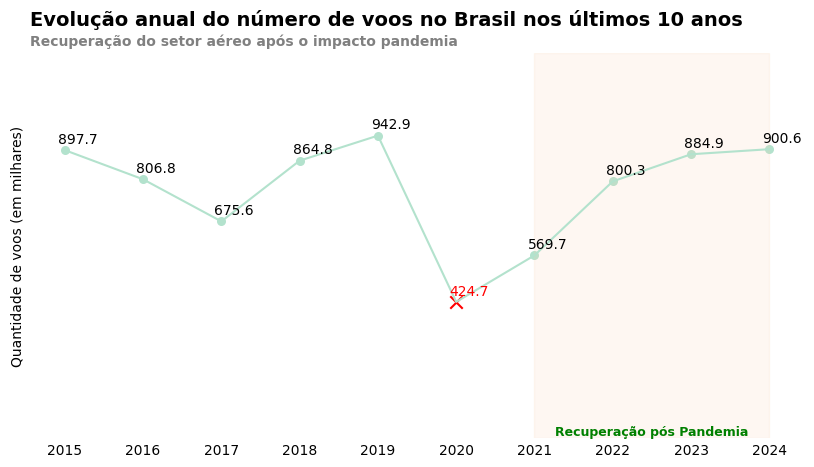

In [21]:
# Conversão de voos por ano para milhares
voos_em_milhares = voos_por_ano / 1000

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Plotando a evolução do número de voos ao longo dos anos
ax.plot(voos_por_ano.index, voos_em_milhares)

# Determinando os marcadores para os pontos de mínimo
marcadores = np.where(voos_em_milhares == voos_em_milhares.min(), 'x', 'o')

# Iteração para adicionar marcadores e anotações
for i, (ano, valor) in enumerate(voos_em_milhares.items()):
    marcador = marcadores[i]
    tamanho = 80 if marcador == 'x' else 30
    cor = 'red' if marcador == 'x' else cores[0]

    ax.scatter(ano, valor, marker=marcador, s=tamanho, color=cor)
    ax.annotate(f"{valor:.1f}", color=('red' if marcador == 'x' else 'black'),
                xy=(ano, valor), xytext=(-5, 5), textcoords='offset points')

# Configurações do eixo
ax.set_ylabel('Quantidade de voos (em milhares)')
ax.set_ylim((0, 1200))
ax.set_yticks([])
ax.set_xticks(voos_por_ano.index)
ax.tick_params(axis='x', size=0)

# Título e textos adicionais
ax.set_title('Evolução anual do número de voos no Brasil nos últimos 10 anos',
             fontsize=14, fontweight='bold', loc='left', pad=20)
ax.text(0, 1.02, 'Recuperação do setor aéreo após o impacto pandemia',
        fontsize=10, color='grey', fontweight='bold', transform=ax.transAxes)
ax.text((2021 + 2024) / 2, 0.15, 'Recuperação pós Pandemia',
        fontsize=9, color='green', fontweight='bold', ha='center', va='bottom')

# Destaque para o período pós-pandemia
ax.axvspan(2021, 2024, color=cores[1], alpha=0.15)

# Remove o quadro em volta do gráfico
ax.set_frame_on(False)

# Exibição do gráfico
plt.show()

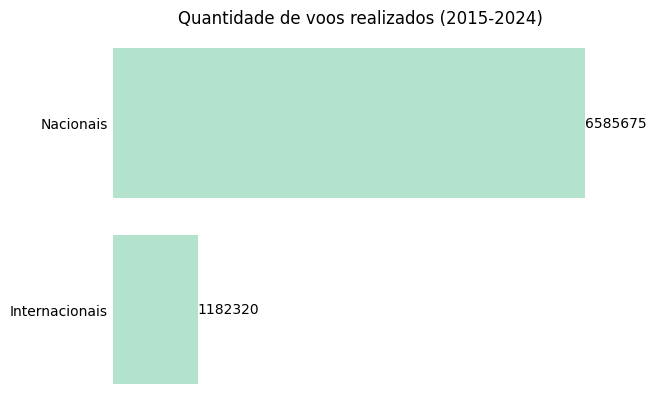

In [22]:
# Quantidade de voos por categoria
voos_por_categoria = df_vra['Código Tipo Linha'].value_counts()

# Gráfico comparativo
fig, ax = plt.subplots()

# Criando o gráfico de barras horizontais
barras = ax.barh(voos_por_categoria.index, voos_por_categoria)

# Adicionando rótulos nas barras
ax.bar_label(barras, labels=voos_por_categoria)

# Ajustando o eixo y com categorias específicas
categorias = ['Nacionais', 'Internacionais']
ax.set_yticks(range(len(categorias)))
ax.set_yticklabels(categorias)

# Removendo os ticks do eixo x
ax.tick_params(axis='y', size=0)
ax.set_xticks([])

# Definindo título e outros parâmetros do gráfico
ax.set_title('Quantidade de voos realizados (2015-2024)')
ax.set_frame_on(False)
ax.invert_yaxis()  # Inverte o eixo Y para colocar as barras em ordem crescente
plt.show()

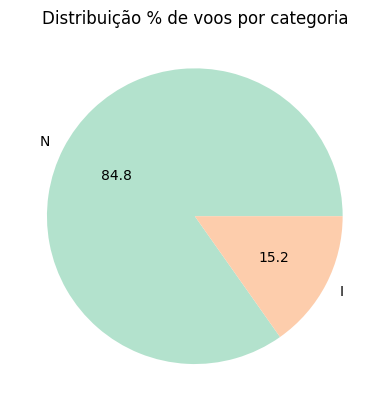

In [23]:
plt.pie(voos_por_categoria, labels=voos_por_categoria.index, autopct='%.1f')
plt.title('Distribuição % de voos por categoria')
plt.show()

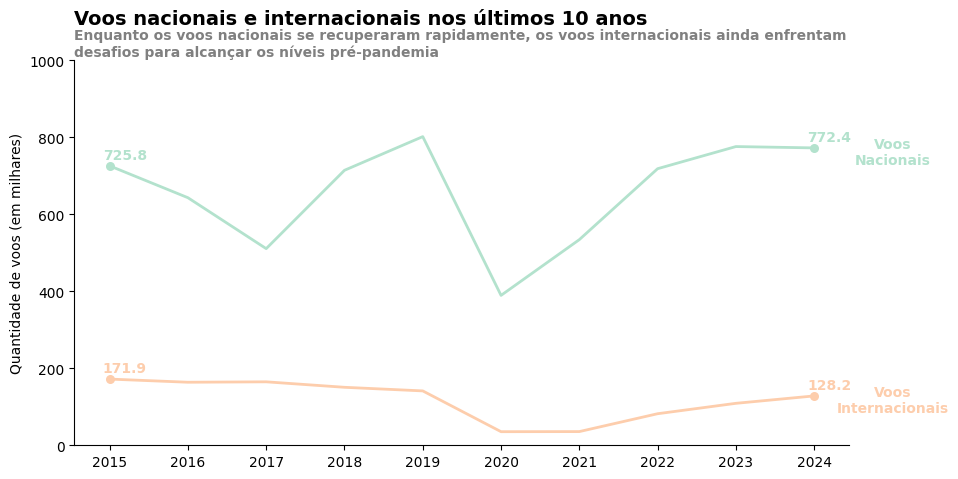

In [24]:

# DataFrame para voos nacionais
df_nacional = df_vra[df_vra['Código Tipo Linha'] == 'N']
voo_nacional_por_ano = df_nacional.groupby('Ano de Referência').size()
voo_nacional_milhares = voo_nacional_por_ano / 1_000

# DataFrame para voos internacionais
df_internacional = df_vra[df_vra['Código Tipo Linha'] == 'I']
voo_internacional_por_ano = df_internacional.groupby('Ano de Referência').size()
voo_internacional_milhares = voo_internacional_por_ano / 1_000

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5))

# Linha de voos nacionais
ax.plot(
    voo_nacional_por_ano.index,
    voo_nacional_milhares.values,
    linewidth=2,
    color=cores[0]
)

# Marcadores e anotações para voos nacionais
for ano, valor in voo_nacional_milhares.items():
    if ano in [2015, 2024]:
        ax.scatter(ano, valor, marker='o', s=tamanho, color=cores[0])
        ax.annotate(
            f"{valor:.1f}",
            color=cores[0],
            weight='bold',
            xy=(ano, valor),
            xytext=(-5, 5),
            textcoords='offset points'
        )

# Texto explicativo para voos nacionais
ax.text(
    voo_nacional_por_ano.index[-1] + 1,
    voo_nacional_milhares.values[-1] - 50,
    'Voos\nNacionais',
    color=cores[0], weight='bold', fontsize=10, verticalalignment='bottom', horizontalalignment='center'
)

# Linha de voos internacionais
ax.plot(
    voo_internacional_por_ano.index,
    voo_internacional_milhares,
    linewidth=2,
    color=cores[1]
)

# Marcadores e anotações para voos internacionais
for ano, valor in voo_internacional_milhares.items():
    if ano in [2015, 2024]:
        ax.scatter(ano, valor, marker='o', s=tamanho, color=cores[1])
        ax.annotate(
            f"{valor:.1f}",
            color=cores[1],
            weight='bold',
            xy=(ano, valor),
            xytext=(-5, 5),
            textcoords='offset points'
        )

# Texto explicativo para voos internacionais
ax.text(
    voo_internacional_por_ano.index[-1] + 1,
    voo_internacional_milhares.values[-1] - 50,
    'Voos\nInternacionais',
    color=cores[1], weight='bold', fontsize=10, verticalalignment='bottom', horizontalalignment='center'
)

# Configuração do eixo Y
ax.set_ylim(0, 1000)
ax.set_ylabel('Quantidade de voos (em milhares)')

# Configuração do eixo X
ax.set_xticks(voo_nacional_por_ano.index)

# Ajustes visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Título do gráfico
ax.set_title(
    'Voos nacionais e internacionais nos últimos 10 anos',
    fontsize=14, fontweight='bold', loc='left', pad=26)

# Texto adicional
ax.text(
    0, 1.01,
    'Enquanto os voos nacionais se recuperaram rapidamente, os voos internacionais ainda enfrentam\n'
    'desafios para alcançar os níveis pré-pandemia',
    fontsize=10, color='grey', fontweight='bold', transform=ax.transAxes)

# Exibir gráfico
plt.show()

In [25]:
# Agrupamento por Ano e Mês para análise de sazonalidade
df_sazonalidade = df_vra.groupby(['Ano de Referência', 'Mês de Referência']).size().unstack(level=0)

# Total de voos por mês
total_voos_por_mes = df_sazonalidade.sum(axis=1)

# Média de voos por mês
media_voos_por_mes = df_sazonalidade.mean(axis=1)

# Desvio padrão para cada mês
desvio_padrao_voos_por_mes = df_sazonalidade.std(axis=1)

# Coeficiente de variação
cv = (desvio_padrao_voos_por_mes / media_voos_por_mes) * 100

# Criando DataFrame com as métricas mensais
analise_mensal = pd.DataFrame({
    'Qtde voos (2015-2024)': total_voos_por_mes,
    'Média voos': media_voos_por_mes,
    'Desvio padrão': desvio_padrao_voos_por_mes,
    'Coeficiente de variação (%)': cv})

In [26]:
# Estilizando o DataFrame para destacar o mês mais e menos movimentado em verde e vermelho
df_sazonalidade = df_sazonalidade.style.apply(lambda lin: [
    'background-color: green' if v == lin.max() else
    'background-color: red' if v == lin.min() else ''
    for v in lin], axis=0)

# Exibindo o DataFrame estilizado
display(df_sazonalidade)

Ano de Referência,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Mês de Referência,,,,,,,,,,
1,81104,81526,71475,50776,88414,89300,55140,66925,79693,78177
2,69660,69476,59931,42704,76181,77163,40334,53237,66328,69955
3,73999,69764,66560,52897,79497,57644,36103,61948,74081,73637
4,69307,64324,60280,76575,73852,4176,26188,60839,70183,73729
5,70717,63703,63560,79588,73017,5592,33193,66352,74368,71606
6,72674,63551,60982,76599,71117,8628,38434,62100,71388,71757
7,80979,68598,68838,86430,82349,15372,50357,73047,78991,80593
8,75893,67169,45812,81152,77718,20288,51107,69772,76944,77668
9,74050,63616,43087,77706,77089,26074,53072,67547,72558,74758


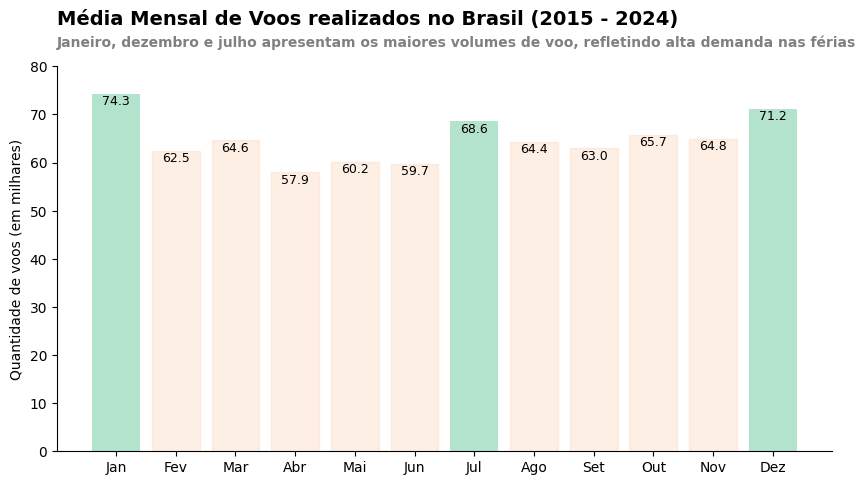

In [27]:
# Convertendo a média de voos por mês para milhares
media_voos_por_mes_em_milhares = media_voos_por_mes / 1000

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5))

# Criando as barras do gráfico
barras = ax.bar(media_voos_por_mes.index, media_voos_por_mes_em_milhares)

# Adicionando rótulos às barras
ax.bar_label(
    barras,
    labels=media_voos_por_mes_em_milhares.round(1),
    padding=-10, color='black', fontsize=9)

# Alterando a cor e transparência das barras para meses que não são pico
for i, barra in enumerate(barras):
    if i not in [0, 6, 11]:  # Janeiro, julho e dezembro mantêm a cor padrão
        barra.set_color(cores[1])
        barra.set_alpha(0.3)

# Configuração do eixo Y
ax.set_ylim(0, 80)
ax.set_ylabel('Quantidade de voos (em milhares)')

# Configuração do eixo X
ax.set_xticks(
    ticks=media_voos_por_mes.index,
    labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Título e anotação informativa
ax.set_title(
    'Média Mensal de Voos realizados no Brasil (2015 - 2024)',
    fontsize=14, fontweight='bold', loc='left', pad=30)

ax.text(
    0, 1.05,
    'Janeiro, dezembro e julho apresentam os maiores volumes de voo, refletindo alta demanda nas férias',
    fontsize=10, color='grey', fontweight='bold', transform=ax.transAxes)

# Removendo bordas desnecessárias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibindo o gráfico
plt.show()

In [28]:
# Quantidade de voos por empresa aérea
voos_por_empresa = df_vra['Empresa Aérea'].value_counts().sort_values(ascending=False)

# Percentual de voos realizados por empresa
representatividade_empresa = (voos_por_empresa / voos_por_empresa.sum()) * 100

# DataFrame de voos por empresa
df_voos_empresa = pd.DataFrame({
    'Quantidade de Voos': voos_por_empresa,
    'Representatividade (%)': representatividade_empresa})

# Exibição das 10 principais empresas aéreas
display(df_voos_empresa.head(10))


,Quantidade de Voos,Representatividade (%)
Empresa Aérea,,
AZUL LINHAS AÉREAS BRASILEIRAS S/A,2426993,31.243493
GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.),2003359,25.789911
TAM LINHAS AÉREAS S.A.,1961334,25.248909
OCEANAIR LINHAS AÉREAS S.A. (AVIANCA),335869,4.323754
COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLINES),90790,1.168770
PASSAREDO TRANSPORTES AÉREOS S.A.,90194,1.161098
AEROLINEAS ARGENTINAS S/A,71688,0.922864
"AMERICAN AIRLINES, INC.",70253,0.904390
TAP - TRANSPORTES AÉREOS PORTUGUESES S/A,66339,0.854004


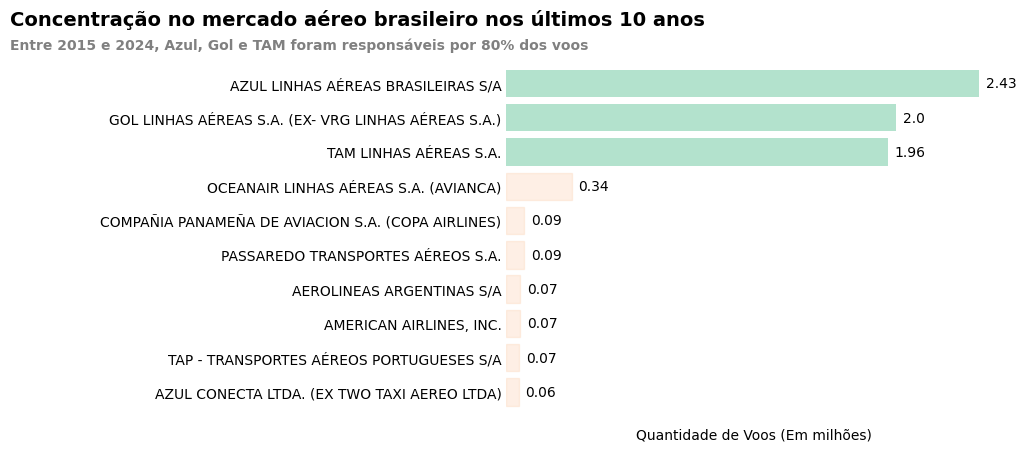

In [29]:
top_10_empresas = voos_por_empresa.nlargest(10)
top_10_em_milhoes = top_10_empresas / 1_000_000


# Criando a figura e os eixos
fig, ax = plt.subplots()

# Criando as barras horizontais
barras = ax.barh(top_10_empresas.index, top_10_em_milhoes)

# Adicionando rótulos às barras
ax.bar_label(barras, labels=top_10_em_milhoes.round(2), padding=5)

# Configurações do eixo X
ax.set_xticks([])
ax.set_xlabel('Quantidade de Voos (Em milhões)')

# Ajustes visuais no eixo Y e na moldura
ax.tick_params(axis='y', size=0)
ax.set_frame_on(False)

# Alterando a cor das barras a partir da quarta posição
for i, barra in enumerate(barras):
    if i > 2:
        barra.set_color(cores[1])
        barra.set_alpha(0.3)

# Configurações do título
ax.set_title(
    'Concentração no mercado aéreo brasileiro nos últimos 10 anos',
    fontsize=14, fontweight='bold', x=-0.3, pad=20)

# Texto explicativo
ax.text(
    -1, 1.01, 'Entre 2015 e 2024, Azul, Gol e TAM foram responsáveis por 80% dos voos',
    fontsize=10, color='grey', fontweight='bold', transform=ax.transAxes)

# Invertendo a ordem do eixo Y para exibir a maior empresa no topo
ax.invert_yaxis()


### **5.1.2 Análise de rotas**

### **5.1.2.1 Criação e tratamento df_rotas**

Antes de iniciar a análise, foi necessário criar o dataframe `df_rotas`, combinando a base VRA com informações adicionais da base de aeroportos. Isso permitiu uma avaliação detalhada das rotas, considerando origem e destino em diferentes níveis: cidade, estado, região, país e continente.

**Seleção de colunas**

A base de rotas foi criada a partir do dataset VRA, considerando apenas as colunas relevantes para a análise:

- Número Voo
- Sigla ICAO Aeroporto Origem
- Descrição Aeroporto Origem
- Sigla ICAO Aeroporto Destino
- Descrição Aeroporto Destino
- Mês de Referência
- Ano de Referência

**Mapeamento de regiões no Brasil**

Para permitir análises regionais, foi criado um dataframe auxiliar df_regioes, que associa cada unidade federativa (UF) à sua respectiva região geográfica

**Enriquecimento com informações de aeroportos**

Para adicionar detalhes como município, estado, país e continente dos aeroportos de origem e destino, df_rotas foi integrado à base de dados df_aeroporto. Esse processo foi realizado separadamente para os aeroportos de origem e destino, por meio de junções (merge) baseadas no código ICAO dos aeroportos.

Além disso, a base df_regioes foi incorporada para adicionar a informação da região geográfica associada a cada aeroporto.

**Criação de colunas de rotas**

Foram geradas novas colunas para representar as rotas sob diferentes perspectivas:

- Rota Aeroporto: Combinação dos códigos ICAO dos aeroportos de origem e destino.
- Rota UF: Associação entre os estados de origem e destino.
- Rota Região: Indicação das regiões de origem e destino.
- Rota País: Diferenciação entre voos nacionais e internacionais.

**Classificação das rotas em domésticas e internacionais**

Para diferenciar os padrões de tráfego aéreo dentro e fora do Brasil, as rotas foram segmentadas em duas categorias:

- Rotas Domésticas: Voos cuja origem e destino estão dentro do território brasileiro.
- Rotas Internacionais: Voos que envolvem pelo menos um aeroporto localizado fora do Brasil.

A separação foi realizada com base na variável País Origem e País Destino, gerando dois subconjuntos de dados:

df_rotas_nacionais: Contém apenas voos com aeroportos de origem e destino no Brasil.
df_rotas_internacionais: Inclui voos em que pelo menos um dos aeroportos está localizado fora do Brasil.


In [30]:
# Seleção das colunas relevantes
df_rotas = df_vra[['Número Voo', 'Sigla ICAO Aeroporto Origem', 'Descrição Aeroporto Origem',
                   'Sigla ICAO Aeroporto Destino', 'Descrição Aeroporto Destino',
                   'Mês de Referência', 'Ano de Referência']]

# Criando DataFrame auxiliar para análise por região
regioes_brasil = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Sul": ["PR", "RS", "SC"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"]}

# Criando listas de estados e regiões
ufs, regioes = [], []
for regiao, estados in regioes_brasil.items():
    for uf in estados:
        ufs.append(uf)
        regioes.append(regiao)

df_regioes = pd.DataFrame({'UF': ufs, 'Regiao': regioes})

# Adicionando informações de Origem no df_rotas
df_rotas = df_rotas.rename(columns={'Sigla ICAO Aeroporto Origem': 'Código ICAO'})
df_rotas = df_rotas.merge(df_aeroporto, on='Código ICAO', how='left')
df_rotas = df_rotas.merge(df_regioes, on='UF', how='left')

df_rotas = df_rotas.rename(columns={
    'Código ICAO': 'Sigla ICAO Aeroporto Origem',
    'Nome': 'Nome Aeroporto Origem',
    'Município': 'Município Origem',
    'UF': 'UF Origem',
    'País': 'País Origem',
    'Continente': 'Continente Origem',
    'Regiao': 'Regiao Origem'})

# Adicionando informações de Destino no df_rotas
df_rotas = df_rotas.rename(columns={'Sigla ICAO Aeroporto Destino': 'Código ICAO'})
df_rotas = df_rotas.merge(df_aeroporto, on='Código ICAO', how='left')
df_rotas = df_rotas.merge(df_regioes, on='UF', how='left')

df_rotas = df_rotas.rename(columns={
    'Código ICAO': 'Sigla ICAO Aeroporto Destino',
    'Nome': 'Nome Aeroporto Destino',
    'Município': 'Município Destino',
    'UF': 'UF Destino',
    'País': 'País Destino',
    'Continente': 'Continente Destino',
    'Regiao': 'Regiao Destino'})

# Criando colunas de rotas
df_rotas['Rota Aeroporto'] = df_rotas['Sigla ICAO Aeroporto Origem'] + '-' + df_rotas['Sigla ICAO Aeroporto Destino']
df_rotas['Rota UF'] = df_rotas['UF Origem'] + '-' + df_rotas['UF Destino']
df_rotas['Rota Regiao'] = df_rotas['Regiao Origem'] + '-' + df_rotas['Regiao Destino']
df_rotas['Rota País'] = df_rotas['País Origem'] + '-' + df_rotas['País Destino']

df_rotas.head(5)

,Número Voo,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Mês de Referência,Ano de Referência,Nome Aeroporto Origem,Município Origem,UF Origem,...,UF Destino,País Destino,Continente Destino,2_y,Unnamed: 7_y,Regiao Destino,Rota Aeroporto,Rota UF,Rota Regiao,Rota País
0,203,SBPA,SALGADO FILHO - PORTO ALEGRE - RS - BRASIL,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",1,2015,SALGADO FILHO,PORTO ALEGRE,RS,...,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,145.0,NaN,NaN,SBPA-KMIA,NaN,NaN,BRASIL-ESTADOS UNIDOS DA AMERICA
1,203,SBCT,AFONSO PENA - SÃO JOSÉ DOS PINHAIS - PR - BRASIL,SBPA,SALGADO FILHO - PORTO ALEGRE - RS - BRASIL,1,2015,AFONSO PENA,CURITIBA,PR,...,RS,BRASIL,AMERICA DO SUL,NaN,NaN,Sul,SBCT-SBPA,PR-RS,Sul-Sul,BRASIL-BRASIL
2,203,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",SBCT,AFONSO PENA - SÃO JOSÉ DOS PINHAIS - PR - BRASIL,1,2015,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,...,PR,BRASIL,AMERICA DO SUL,NaN,NaN,Sul,KMIA-SBCT,NaN,NaN,ESTADOS UNIDOS DA AMERICA-BRASIL
3,213,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,1,2015,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,...,DF,BRASIL,AMERICA DO SUL,NaN,NaN,Centro-Oeste,KMIA-SBBR,NaN,NaN,ESTADOS UNIDOS DA AMERICA-BRASIL
4,214,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",1,2015,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,...,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,145.0,NaN,NaN,SBBR-KMIA,NaN,NaN,BRASIL-ESTADOS UNIDOS DA AMERICA


In [31]:
df_rotas.isna().sum().sort_values(ascending=False)


Unnamed: 7_x                    7767995
Unnamed: 7_y                    7767995
2_y                             7098370
2_x                             7097691
Rota Regiao                     1176240
Rota UF                         1176229
Regiao Origem                    666919
UF Origem                        666910
Regiao Destino                   666243
UF Destino                       666230
Município Destino                 11304
Município Origem                  11282
Rota País                          7804
País Origem                        3972
Continente Origem                  3972
Nome Aeroporto Origem              3972
País Destino                       3933
Continente Destino                 3933
Nome Aeroporto Destino             3933
Descrição Aeroporto Destino         418
Descrição Aeroporto Origem          418
Mês de Referência                     0
Sigla ICAO Aeroporto Origem           0
Número Voo                            0
Sigla ICAO Aeroporto Destino          0


In [32]:
# Limpeza de colunas desnecessárias
df_rotas = df_rotas.drop(['Unnamed: 7_x' ,'2_x', 'Unnamed: 7_y','2_y'], axis=1)

In [33]:
# Separação do df_rotas em rotas domésticas e internacionais
df_rotas_nacionais = df_rotas[(df_rotas['País Origem'] == 'BRASIL') & (df_rotas['País Destino'] == 'BRASIL')]

df_rotas_internacionais = df_rotas[(df_rotas['País Origem'] != 'BRASIL') | (df_rotas['País Destino'] != 'BRASIL')]

In [34]:
df_rotas_nacionais.isna().sum().sort_values(ascending=False)

Descrição Aeroporto Origem      13
Descrição Aeroporto Destino     13
Número Voo                       0
Sigla ICAO Aeroporto Origem      0
Sigla ICAO Aeroporto Destino     0
Mês de Referência                0
Ano de Referência                0
Nome Aeroporto Origem            0
Município Origem                 0
UF Origem                        0
País Origem                      0
Continente Origem                0
Regiao Origem                    0
Nome Aeroporto Destino           0
Município Destino                0
UF Destino                       0
País Destino                     0
Continente Destino               0
Regiao Destino                   0
Rota Aeroporto                   0
Rota UF                          0
Rota Regiao                      0
Rota País                        0
dtype: int64

In [35]:
df_rotas_internacionais.isna().sum().sort_values(ascending=False)

Rota Regiao                     1176240
Rota UF                         1176229
Regiao Origem                    666919
UF Origem                        666910
Regiao Destino                   666243
UF Destino                       666230
Município Destino                 11304
Município Origem                  11282
Rota País                          7804
Nome Aeroporto Origem              3972
Continente Origem                  3972
País Origem                        3972
Nome Aeroporto Destino             3933
Continente Destino                 3933
País Destino                       3933
Descrição Aeroporto Origem          405
Descrição Aeroporto Destino         405
Ano de Referência                     0
Sigla ICAO Aeroporto Origem           0
Número Voo                            0
Mês de Referência                     0
Sigla ICAO Aeroporto Destino          0
Rota Aeroporto                        0
dtype: int64

### **5.1.2.2 Principais rotas**

**Conexões interestaduais**

- A principal **rota aérea nacional** entre 2015 e 2024 foi a conexão entre **São Paulo** e **Rio de Janeiro** (SP - RJ e RJ - SP), com um total de **532.328 voos** realizados ao longo dos 10 anos analisados.

- **São Paulo** destaca-se como o principal ponto de **conexão** do Brasil, aparecendo em todas as 10 rotas aéreas mais frequentes do período de 2015 a 2024.

**Movimentação (pousos + decolagens) aérea nos estados brasileiros**

- **São Paulo** concentra aproximadamente **30% da movimentação aérea** do país, considerando apenas os **voos domésticos**.

- Com **5.4% de CAGR**, **Pernambuco** se destacou com o maior crescimento na movimentação aérea entre 2015 e 2024. Obs: **CAGR** - taxa composta de crescimento anual mostra a taxa média de crescimento ao longo do tempo.

- Em termos de **crescimento**, os estados com a maior média, considerando o **CAGR**, foram: **Pernambuco, Alagoas, Roraima, Tocantins** e **Paraíba**.

- Com **-10.7% de CAGR**, **Rondônia** teve a maior **queda** na movimentação aérea, apresentando uma diminuição significativa durante o período.

**Conexões internacionais**

- Nos últimos 10 anos, as principais **conexões internacionais** do Brasil foram com a **Argentina**, os **Estados Unidos** e o **Chile**, com os seguintes volumes de voos registrados:

    - **Brasil ↔ Argentina**: **213.410 voos**
    - **Brasil ↔ Estados Unidos**: **177.631 voos**
    - **Brasil ↔ Chile**: **94.496 voos**




In [36]:
voos_por_rota = df_rotas_nacionais['Rota UF'].value_counts()
voos_por_rota.head(20)

Rota UF
SP-RJ    267641
RJ-SP    264687
SP-PR    210318
PR-SP    209489
SP-SP    203726
SP-MG    182899
MG-SP    182113
SC-SP    166411
SP-SC    166379
SP-RS    150495
RS-SP    147077
SP-BA    141112
BA-SP    139786
SP-DF    126921
DF-SP    125943
MG-MG    104135
PE-SP     95659
SP-PE     94515
GO-SP     75392
SP-GO     75175
Name: count, dtype: int64

São Paulo está presente em 19 das principais rotas interestaduais do Brasil.

No entanto, para uma análise mais clara das conexões mais frequentes entre os estados, é necessário padronizar os dados. Para isso, as rotas serão tratadas de forma que trajetos como "SP - RJ" e "RJ - SP" sejam considerados uma única conexão, eliminando redundâncias e permitindo uma visão mais precisa dos fluxos de viagem

In [37]:
df_conexoes_uf = df_rotas_nacionais[['Mês de Referência', 'Ano de Referência','UF Origem', 'UF Destino']].copy()

# Adicionando coluna 'Rota UF' unificada
df_conexoes_uf['Rota UF'] = df_conexoes_uf.apply(
    lambda x: '<-->'.join(sorted([x['UF Origem'], x['UF Destino']])), axis=1)

# Contagem de voos por rota
voos_por_rota = df_conexoes_uf['Rota UF'].value_counts()

# Exibindo a contagem de voos por rota
voos_por_rota

Rota UF
RJ<-->SP    532328
PR<-->SP    419807
MG<-->SP    365012
SC<-->SP    332790
RS<-->SP    297572
             ...  
RS<-->SE         1
AP<-->RR         1
RO<-->TO         1
AP<-->PI         1
PB<-->SC         1
Name: count, Length: 323, dtype: int64

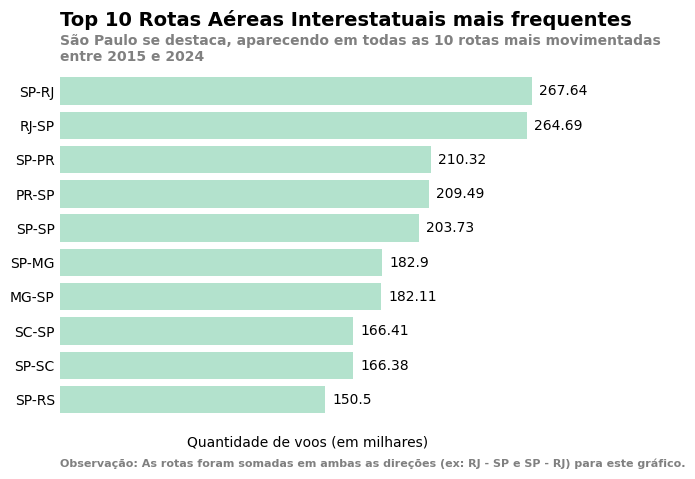

In [37]:
# Top 10 rotas aéreas mais frequentes
top_10_rotas = voos_por_rota.nlargest(10)

# Convertendo voos para milhares
top_10_em_milhares = top_10_rotas / 1_000

# Criando o gráfico
fig, ax = plt.subplots()

# Criando as barras horizontais
barras = ax.barh(top_10_rotas.index, top_10_em_milhares)

# Adicionando rótulos nas barras
ax.bar_label(barras, labels=top_10_em_milhares.round(2), padding=5)

# Configurações do gráfico
ax.set_xticks([])
ax.set_xlabel('Quantidade de voos (em milhares)')
ax.tick_params(axis='y', size=0)
ax.set_frame_on(False)

# Título e textos adicionais
ax.set_title(
    'Top 10 Rotas Aéreas Interestatuais mais frequentes',
    fontsize=14, fontweight='bold', pad=25, loc='left'
)

ax.text(
    0, 1,
    'São Paulo se destaca, aparecendo em todas as 10 rotas mais movimentadas\nentre 2015 e 2024',
    fontsize=10, color='grey', fontweight='bold', ha='left', transform=ax.transAxes
)

ax.text(
    0, -0.1,
    'Observação: As rotas foram somadas em ambas as direções (ex: RJ - SP e SP - RJ) para este gráfico.',
    fontsize=8, color='grey', fontweight='bold', ha='left', transform=ax.transAxes
)

# Invertendo a ordem das barras no eixo Y
ax.invert_yaxis()

In [38]:
# Cálculo da movimentação aérea total por estado (Decolagens + Pousos)
movimentacao_por_uf = df_rotas['UF Destino'].value_counts() + df_rotas['UF Origem'].value_counts()

# Cálculo do percentual de movimentação por estado
representatividade_uf = (movimentacao_por_uf / movimentacao_por_uf.sum()) * 100

# Criação do DataFrame de movimentação por estado, com total de decolagens e pousos e representatividade
df_movimentacao_uf = pd.DataFrame({
    'Total Decolagens e Pousos': movimentacao_por_uf,
    'Representatividade(%)': representatividade_uf})

# Correção para considerar apenas estados brasileiros
df_movimentacao_uf = df_movimentacao_uf.drop(df_movimentacao_uf.tail(2).index)

# Exibição do DataFrame resultante
display(df_movimentacao_uf)

,Total Decolagens e Pousos,Representatividade(%)
UF Destino,,
SP,4670131,32.881647
RJ,1436912,10.117068
MG,1033026,7.273371
DF,1010927,7.117776
PR,757438,5.333000
BA,728405,5.128583
PE,676629,4.764037
RS,556850,3.920692
SC,470444,3.312321


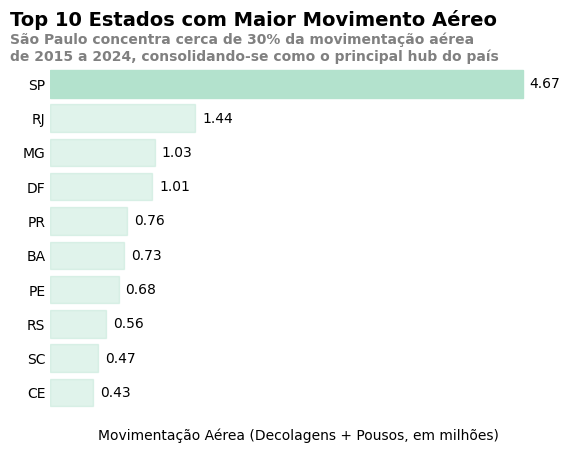

In [39]:
# Top 10 estados com maior movimentação aérea (em milhões)
top_10_uf = movimentacao_por_uf.nlargest(10)
top_10_em_milhoes = top_10_uf / 1_000_000

# Criação do gráfico
fig, ax = plt.subplots()

# Barras horizontais com os dados
barras = ax.barh(top_10_uf.index, top_10_em_milhoes)
ax.bar_label(barras, labels=top_10_em_milhoes.round(2), padding=5)

# Configurações do eixo X e Y
ax.set_xticks([])
ax.set_xlabel('Movimentação Aérea (Decolagens + Pousos, em milhões)')
ax.tick_params(axis='y', size=0)
ax.set_frame_on(False)

# Definição de cores e transparência para as barras
for i, barra in enumerate(barras):
    if i > 0:
        barra.set_color(cores[0])
        barra.set_alpha(0.4)
    else:
        barra.set_color(cores[0])

# Título e texto explicativo
ax.set_title('Top 10 Estados com Maior Movimento Aéreo',
             fontsize=14, fontweight='bold', x=0.41, pad=20)

ax.text(-0.08, 0.98,
        'São Paulo concentra cerca de 30% da movimentação aérea\nde 2015 a 2024, consolidando-se como o principal hub do país',
        fontsize=10, color='grey', fontweight='bold', transform=ax.transAxes)

# Inverter a ordem das barras
ax.invert_yaxis()

In [40]:
# Contagem de decolagens e pousos por estado e ano
decolagem_por_uf = df_rotas_nacionais.groupby(['Ano de Referência', 'UF Origem']).size()
pouso_por_uf = df_rotas_nacionais.groupby(['Ano de Referência', 'UF Destino']).size()

# Somar as quantidades de voos de origem e destino para cada estado por ano
fluxo_por_uf = decolagem_por_uf.add(pouso_por_uf, fill_value=0)

# Transformar o resultado para que cada estado tenha a quantidade de voos somada por ano
df_evolucao_anual_uf = fluxo_por_uf.unstack(level=0)

# Calcular o CAGR (Taxa de Crescimento Anual Composta) para cada estado
valor_inicial = df_evolucao_anual_uf.iloc[:, 0]  # Primeiro ano
valor_final = df_evolucao_anual_uf.iloc[:, -1]   # Último ano
anos = df_evolucao_anual_uf.shape[1] - 1     # Número de anos (menos o primeiro)

# Aplicar a fórmula do CAGR
CAGR = (valor_final / valor_inicial) ** (1 / anos) - 1

# Adicionar a coluna de CAGR no dataframe (em porcentagem)
df_evolucao_anual_uf['CAGR'] = CAGR * 100

# Ordenar os estados pelo CAGR em ordem decrescente
df_evolucao_anual_uf_sorted = df_evolucao_anual_uf.sort_values(by='CAGR', ascending=False)

# Exibir o dataframe ordenado
display(df_evolucao_anual_uf_sorted)



Ano de Referência,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,CAGR
UF Origem,,,,,,,,,,,
PE,56383,54464,47816,64083,74561,40525,69821,78084,83959,90211,5.360794
AL,13400,13641,10602,13629,15227,8451,15005,17401,17158,19639,4.338854
RR,2320,2229,1051,1936,2420,1477,2706,2826,2968,3318,4.055581
TO,4021,3313,3068,6286,6849,2717,4120,5587,5845,5472,3.482760
PB,11760,11903,8146,10694,11671,6970,10682,11587,13744,15797,3.333422
SP,389554,365019,298903,439989,504759,248794,328124,449703,502283,508157,2.997239
MG,112560,98285,74965,110580,124206,52121,75799,107919,119914,134889,2.031083
SC,48965,40759,32453,48868,55313,25589,35592,49887,56735,57365,1.774772
AM,26127,21469,13914,24025,29741,17917,26206,28532,26285,29053,1.186455


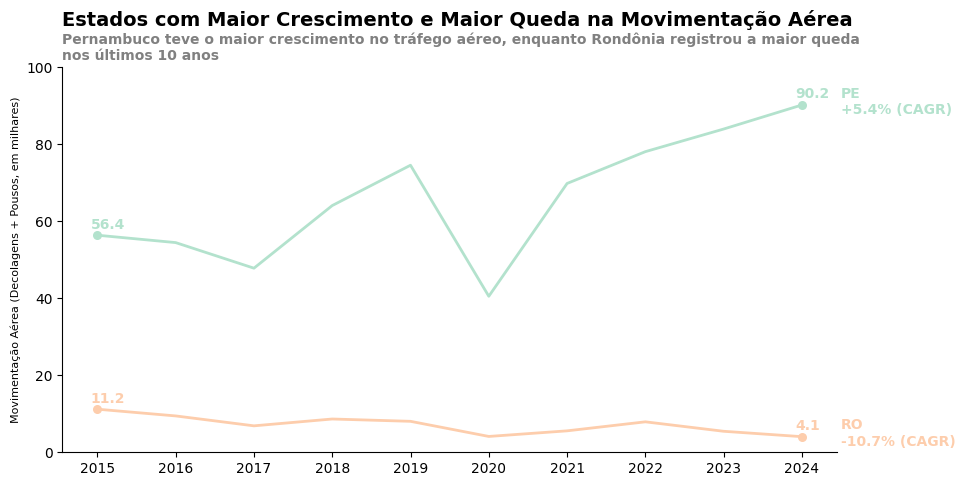

In [41]:
# DataFrame para PE - Estado com maior crescimento
decolagem_pe = df_rotas_nacionais[df_rotas_nacionais['UF Origem'] == 'PE']
pouso_pe = df_rotas_nacionais[df_rotas_nacionais['UF Destino'] == 'PE']

# Agrupar por ano para decolagens e pousos
decolagem_pe_por_ano = decolagem_pe.groupby('Ano de Referência').size()
pouso_pe_por_ano = pouso_pe.groupby('Ano de Referência').size()

# Somar os fluxos de decolagens e pousos para PE
fluxo_pe = decolagem_pe_por_ano.add(pouso_pe_por_ano, fill_value=0)
fluxo_pe_milhares = fluxo_pe / 1_000

# DataFrame para RO - Estado com menor crescimento
decolagem_ro = df_rotas_nacionais[df_rotas_nacionais['UF Origem'] == 'RO']
pouso_ro = df_rotas_nacionais[df_rotas_nacionais['UF Destino'] == 'RO']

# Agrupar por ano para decolagens e pousos
decolagem_ro_por_ano = decolagem_ro.groupby('Ano de Referência').size()
pouso_ro_por_ano = pouso_ro.groupby('Ano de Referência').size()

# Somar os fluxos de decolagens e pousos para RO
fluxo_ro = decolagem_ro_por_ano.add(pouso_ro_por_ano, fill_value=0)
fluxo_ro_milhares = fluxo_ro / 1_000

# Gráfico comparativo de crescimento PE e RO
fig, ax = plt.subplots(figsize=(10, 5))

# Linha de PE
ax.plot(fluxo_pe.index, fluxo_pe_milhares, linewidth=2)
for ano, valor in fluxo_pe_milhares.items():
    if ano in [2015, 2024]:
        ax.scatter(ano, valor, marker='o', s=tamanho, color=cores[0])
        ax.annotate(f"{valor:.1f}", color=cores[0], weight='bold', xy=(ano, valor), xytext=(-5, 5), textcoords='offset points')

ax.text(fluxo_pe.index[-1] + 0.5, fluxo_pe_milhares.values[-1] - 3,
        'PE\n+5.4% (CAGR)',
        color=cores[0], weight='bold', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Linha de RO
ax.plot(fluxo_ro.index, fluxo_ro_milhares, linewidth=2)
for ano, valor in fluxo_ro_milhares.items():
    if ano in [2015, 2024]:
        ax.scatter(ano, valor, marker='o', s=tamanho, color=cores[1])
        ax.annotate(f"{valor:.1f}", color=cores[1], weight='bold', xy=(ano, valor), xytext=(-5, 5), textcoords='offset points')

ax.text(fluxo_ro.index[-1] + 0.5, fluxo_ro_milhares.values[-1] - 3,
        'RO\n-10.7% (CAGR)', 
        color=cores[1], weight='bold', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Ajustes no gráfico
ax.set_ylabel('Movimentação Aérea (Decolagens + Pousos, em milhares)', fontsize=8)

ax.set_ylim((0, 100))

ax.set_xticks(fluxo_pe.index)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

ax.set_title('Estados com Maior Crescimento e Maior Queda na Movimentação Aérea',
             fontsize=14, fontweight='bold', loc='left', pad=30)

ax.text(0, 1.02,
        'Pernambuco teve o maior crescimento no tráfego aéreo, enquanto Rondônia registrou a maior queda\nnos últimos 10 anos',
        fontsize=10, color='grey', fontweight='bold', transform=ax.transAxes)

# Exibir o gráfico
plt.show()



In [42]:
# Fluxo de voos por Região
voos_por_regiao = df_rotas_nacionais['Regiao Destino'].value_counts() + df_rotas_nacionais['Regiao Origem'].value_counts()

# Percentual de voos realizados por Região
representatividade_regiao = (voos_por_regiao / voos_por_regiao.sum()) * 100

# Dataframe fluxo de voos por Região
df_voos_regiao = pd.DataFrame({
    'Quantidade de Voos': voos_por_regiao,
    'Representatividade(%)': representatividade_regiao})

display(df_voos_regiao)

,Quantidade de Voos,Representatividade(%)
Regiao Destino,,
Sudeste,6506856,49.356021
Nordeste,2491409,18.897919
Sul,1725092,13.085225
Centro-Oeste,1622388,12.306192
Norte,837765,6.354643


In [43]:
# Agrupar dados por Região de Origem e Destino
fluxo_por_regiao_origem = df_rotas_nacionais.groupby(['Ano de Referência', 'Regiao Origem']).size()
fluxo_por_regiao_destino = df_rotas_nacionais.groupby(['Ano de Referência', 'Regiao Destino']).size()

# Somar as quantidades de voos de origem e destino para cada região por ano
fluxo_por_regiao = fluxo_por_regiao_origem.add(fluxo_por_regiao_destino, fill_value=0)

# Transformar o resultado para que cada região tenha a quantidade de voos somada por ano
df_evolucao_anual_regiao = fluxo_por_regiao.unstack(level=0)

# Calcular o CAGR para cada região
valor_inicial = df_evolucao_anual_regiao.iloc[:, 0]
valor_final = df_evolucao_anual_regiao.iloc[:, -1]
anos = df_evolucao_anual_regiao.shape[1] - 1

# Aplicar a fórmula do CAGR
CAGR = (valor_final / valor_inicial) ** (1 / anos) - 1

# Adicionar a coluna de CAGR no dataframe
df_evolucao_anual_regiao['CAGR'] = CAGR * 100
# Ordenar pelo CAGR (em ordem decrescente)
df_evolucao_anual_regiao_sorted = df_evolucao_anual_regiao.sort_values(by='CAGR', ascending=False)

# Exibir o dataframe ordenado
display(df_evolucao_anual_regiao_sorted)

Ano de Referência,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,CAGR
Regiao Origem,,,,,,,,,,,
Sudeste,676968,619002,495167,715395,810189,385389,507080,705242,791651,800773,1.883671
Nordeste,268964,239249,197143,252421,283214,145767,231393,280684,290249,302325,1.307643
Norte,103047,81771,57025,85030,97017,57207,79003,93958,89480,94227,-0.989279
Sul,202187,175472,141649,192943,221144,93893,123289,188844,207297,178374,-1.382691
Centro-Oeste,201554,172094,132502,184131,193350,97216,128301,169006,174023,170211,-1.860459


In [44]:
# Selecionar as colunas relevantes e criar uma cópia do DataFrame
df_conexoes_pais = df_rotas_internacionais[['Mês de Referência', 'Ano de Referência', 'País Origem', 'País Destino']].copy()

# Tratar valores ausentes e garantir que as colunas sejam do tipo string
df_conexoes_pais['País Origem'] = df_conexoes_pais['País Origem'].fillna('').astype(str)
df_conexoes_pais['País Destino'] = df_conexoes_pais['País Destino'].fillna('').astype(str)

# Criar a coluna 'Rota País' combinando os países de origem e destino, ordenados alfabeticamente
df_conexoes_pais['Rota País'] = df_conexoes_pais.apply(
    lambda x: '<-->'.join(sorted([x['País Origem'], x['País Destino']])), axis=1
)

# Contar as frequências das rotas
voos_por_rota = df_conexoes_pais['Rota País'].value_counts()

# Exibir as frequências das rotas
voos_por_rota

Rota País
ARGENTINA<-->BRASIL                    213410
BRASIL<-->ESTADOS UNIDOS DA AMERICA    177631
BRASIL<-->CHILE                         94496
BRASIL<-->PORTUGAL                      76828
BRASIL<-->PANAMA                        69193
                                        ...  
<-->CANADA                                  1
PORTUGAL<-->TURQUIA                         1
COLOMBIA<-->EQUADOR                         1
AFRICA DO SUL <-->NAMIBIA                  1
BRASIL<-->REPUBLICA TCHECA                  1
Name: count, Length: 379, dtype: int64

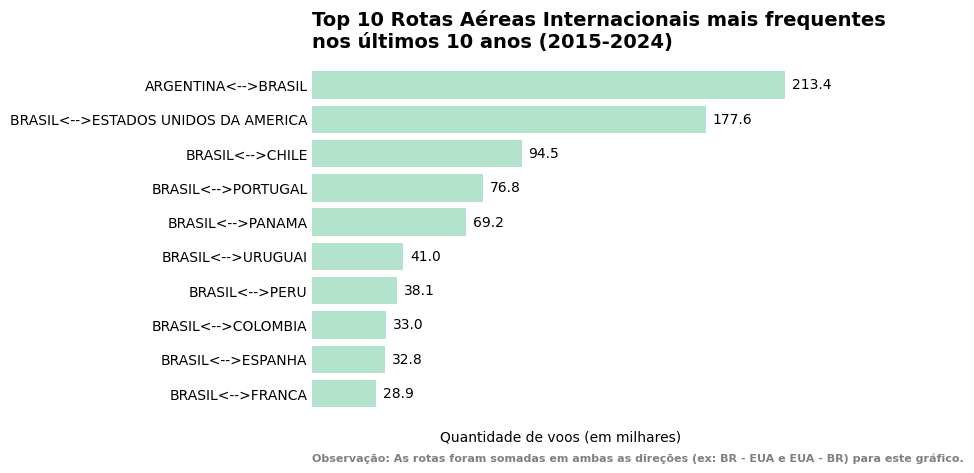

In [45]:
# Obter as top 10 rotas mais frequentes e calcular o valor em milhares
top_10_rotas = voos_por_rota.nlargest(10)
top_10_em_milhares = top_10_rotas / 1_000

# Criar o gráfico
fig, ax = plt.subplots()

# Criar as barras horizontais
barras = ax.barh(top_10_rotas.index, top_10_em_milhares)

# Adicionar rótulos nas barras
ax.bar_label(barras, labels=top_10_em_milhares.round(1), padding=5)

# Ajustar configurações do eixo X e Y
ax.set_xticks([])
ax.set_xlabel('Quantidade de voos (em milhares)')
ax.tick_params(axis='y', size=0)

# Remover o quadro do gráfico
ax.set_frame_on(False)

# Adicionar título e descrição
ax.set_title(
    'Top 10 Rotas Aéreas Internacionais mais frequentes\nnos últimos 10 anos (2015-2024)',
    fontsize=14, fontweight='bold', pad=5, loc='left')

ax.text(
    0, -0.1,
    'Observação: As rotas foram somadas em ambas as direções (ex: BR - EUA e EUA - BR) para este gráfico.',
    fontsize=8, color='grey', fontweight='bold', ha='left', transform=ax.transAxes)

# Inverter o eixo Y para que as barras mais altas fiquem no topo
ax.invert_yaxis()

### **5.2. Análise de Pontualidade**